# PRiAD 5 - test zaliczający

Test obejmuje materiał z ćwiczenia PRiAD5, wymaga także znajmości zagadnień z wcześniejszych ćwiczeń.

---
**Imię, nazwisko i numer indeksu:** Kamil Sztandur 307354

In [1]:
# TU JESZCZE RAZ NALEŻY WPISAĆ NUMER INDEKSU - ZAMIAST CYFR 123456
indeks = "307354"  

---

Generowanie idywidualnego zestawu danych.

In [2]:
# TEN FRAGMENT NALEŻY PO PROSTU URUCHOMIĆ (NIC NIE NALEŻY ZMIENIAĆ)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
if indeks == "123456": 
    print('\nWpisz w pierwszym bloku komend (powyżej) swój numer indeksu !!') 
else:        
    n = np.array(list(indeks),dtype = np.int)
    cechy, klasa = make_classification(n_samples=  (n[0]*11+n[3]*10)*5,  n_classes = n[-2]%3+4, class_sep = n[-4]%2 + 2, n_clusters_per_class = 1,
                                   n_features = 10 - n[-4]%2, n_redundant = 2 - n[-3]%2, n_repeated = n[-3]%2 + 1, n_informative = n[-2]%4+3,                                
                                   random_state = n[0]+n[1]+n[2]+n[5])  
    dane = pd.concat([pd.DataFrame(cechy), pd.DataFrame(klasa, columns =['klasa'])],axis = 1, sort=False)
    print('\nGOTOWE - możesz rozpoczać rozwiązywanie zadań')


GOTOWE - możesz rozpoczać rozwiązywanie zadań


In [3]:
# Rozpoczęcie pracy

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
import random

dane

,0,1,2,3,4,5,6,7,8,klasa
0,-0.757223,-1.372522,3.295354,3.969766,-1.372522,-1.981245,1.285731,5.869615,-0.757223,0
1,-2.377814,2.180370,-3.539408,-3.144650,2.180370,0.972829,0.436149,-4.137604,-2.377814,3
2,-4.060563,-4.153275,-3.148523,3.318838,-4.153275,-0.220958,0.855916,2.056071,-4.060563,4
3,-1.880252,0.684267,-1.546750,3.716309,0.684267,0.344825,-0.488759,2.224615,-1.880252,1
4,-2.819947,1.538573,-3.490132,-3.569213,1.538573,-0.692754,-0.156931,-4.151911,-2.819947,3
...,...,...,...,...,...,...,...,...,...,...
310,-4.893233,4.296761,-3.800386,-1.577808,4.296761,-0.905060,1.117116,-2.273486,-4.893233,3
311,-2.430646,3.416409,-1.603846,3.419509,3.416409,0.411544,0.236227,1.989437,-2.430646,1
312,-1.202158,-0.072307,-1.942487,2.196449,-0.072307,-1.523519,-0.088645,0.588231,-1.202158,1
313,-2.855185,-1.713461,-3.060006,2.548433,-1.713461,0.293082,-0.832644,0.836528,-2.855185,4


> **Zadanie 1** Oceń na podstawie odpowiednich wykresów przydatność poszczególnych atrybutów zbioru `dane`  do klasyfikacji

<AxesSubplot:>

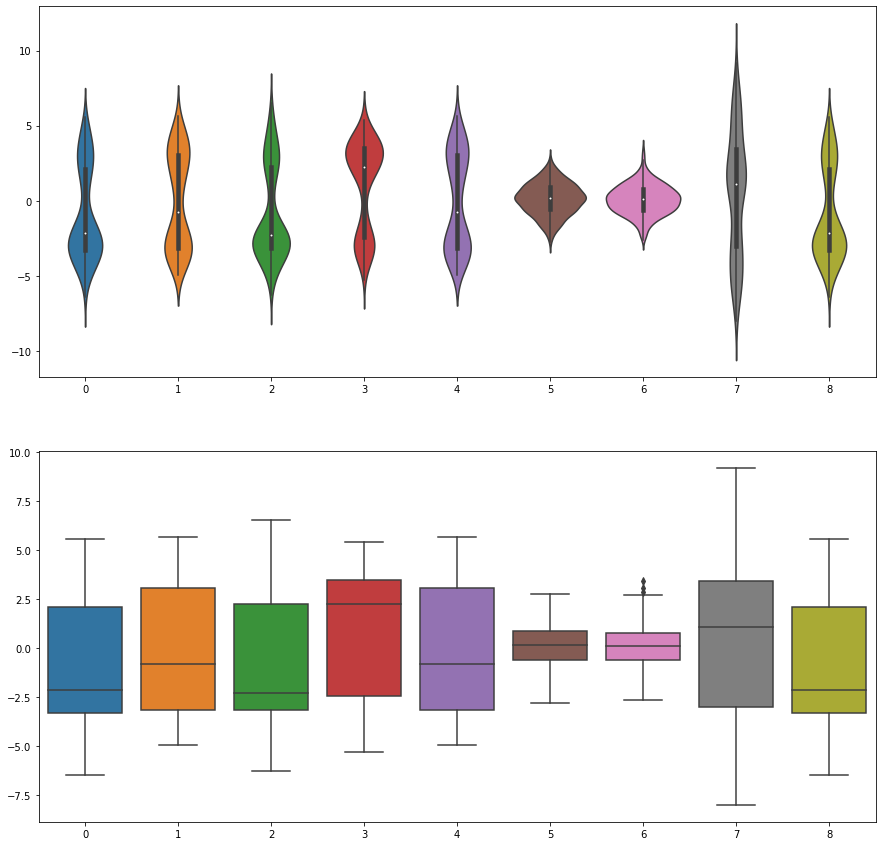

In [4]:
# Zmienność atrybutów
plt.figure(figsize = (15, 15))
plt.subplot(2, 1, 1)
sns.violinplot(data = dane.iloc[:, :-1])

plt.subplot(2, 1, 2)
sns.boxplot(data = dane.iloc[:, :-1])

**Wnioski z analizy dynamiki atrybutów:** 
* Najwyższą zmiennością wykazuje sie atrybut 7. Wykazuje też tendencje do tworzenia się podgrup. Może być ważny.
* Nie należy sugerować się atrybutami 5 i 6. Zgodnie z wykresem skrzypcowym przyjmują tę samą wartość w większości obiektów, a wszelkie odchylenia są pomijalnie małe. Oznacza to, że wartość tych dwóch atrybutów nie zależy od klas. Dodatkowo wykres pudełkowy wykazał prawdopodobne artefakty przy pomiarach atrybutu 6.
* Atrybuty 1 - 4 oraz 8 wykazują tendencje do tworzenia się oddzielnych podgrup (wybrzuszeń). 

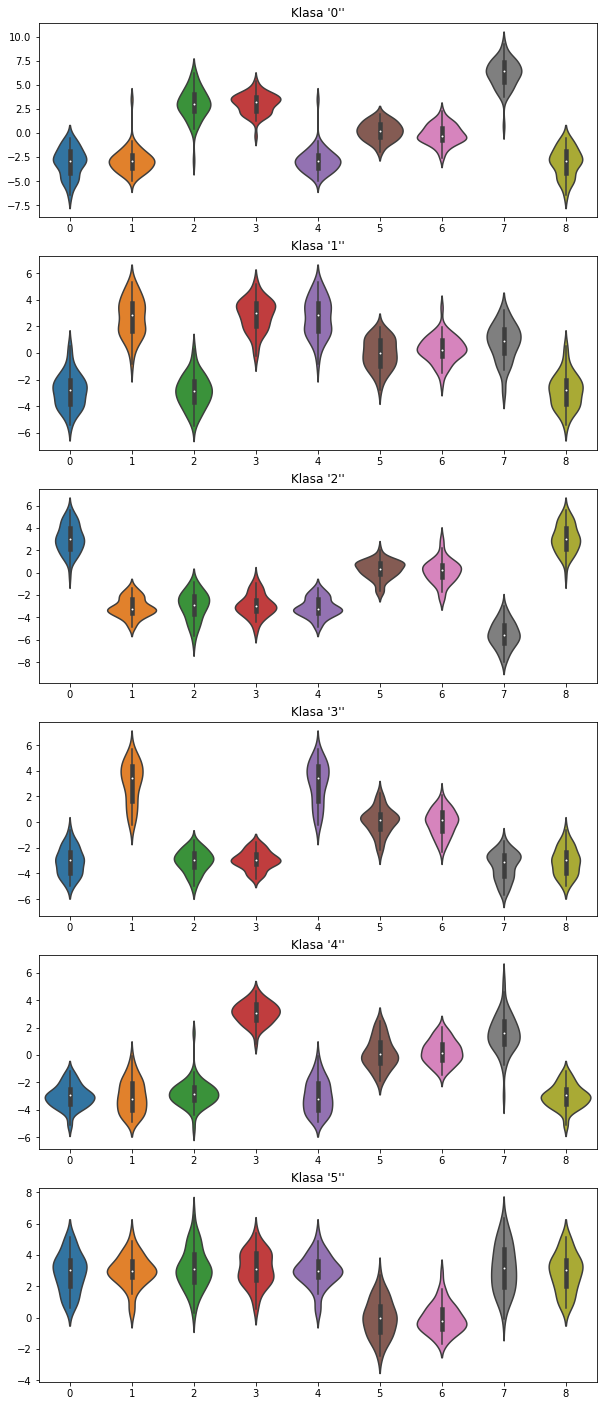

In [11]:
# Poszczególne klasy
klasy = dane.iloc[:, -1].unique()

plt.figure(figsize = (10, 25))
for klasa in klasy:
    plt.subplot(6, 1, (klasa + 1))
    plt.title("Klasa \'%d\''" % klasa)
    sns.violinplot(
        data = dane[dane['klasa'] == klasa].iloc[:, :-1]
    )



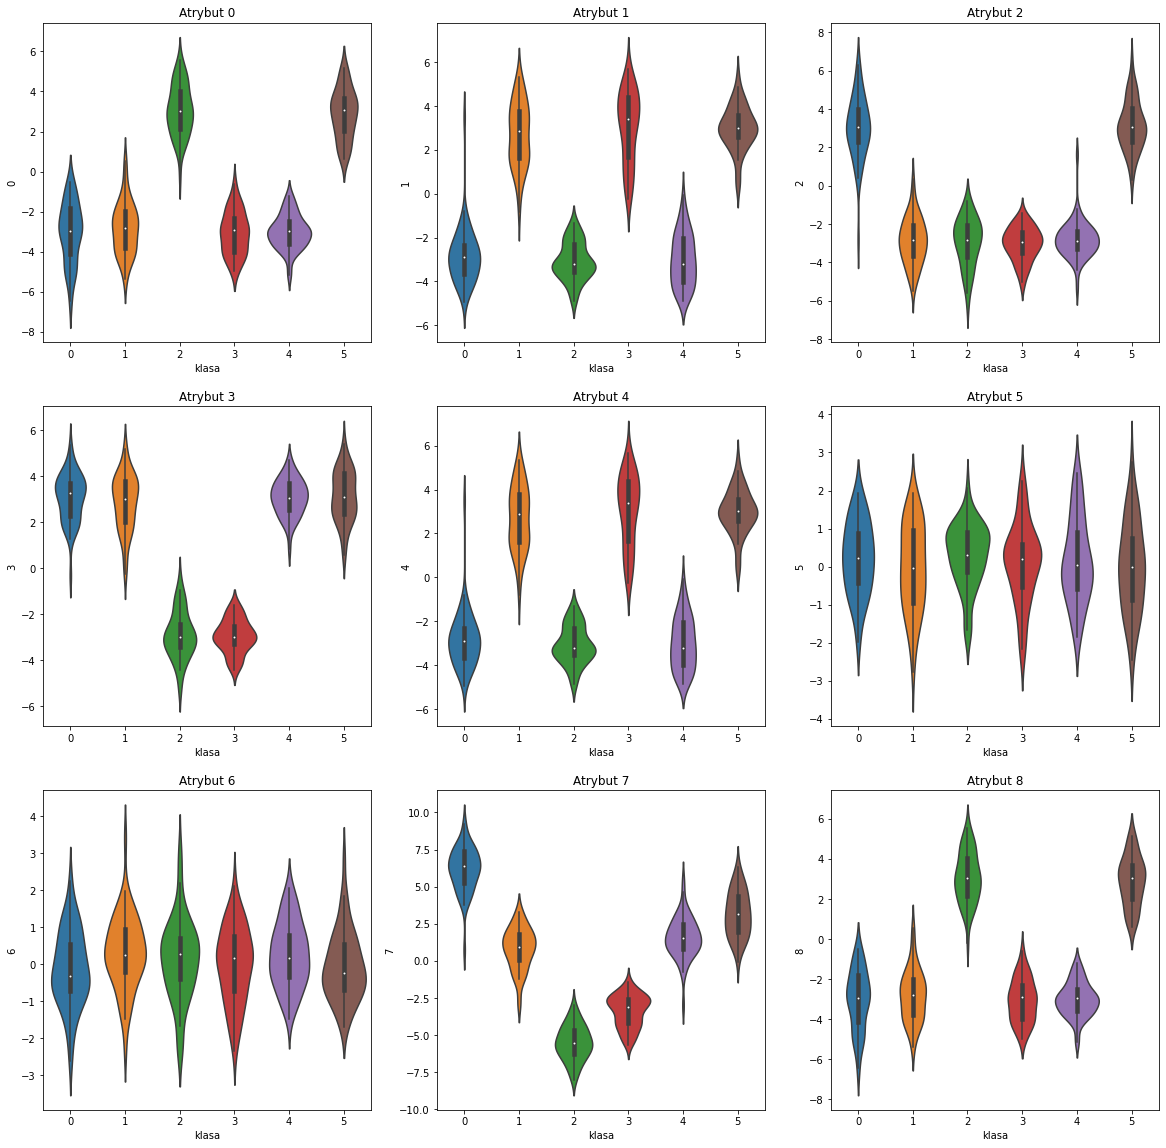

In [5]:
# Poszczególne atrybuty w klasach
plt.figure(figsize = (20, 20))
for attributeIndex in range(0, 9):
    plt.subplot(3, 3, (attributeIndex +1))
    plt.title("Atrybut \'%d\'" % attributeIndex)
    sns.violinplot(x = 'klasa', y = attributeIndex, data = dane)


**Wnioski z analizy wpływu klas na atrybuty:** 
* Atrybuty 5 i 6 po raz kolejny nie wykazują zależności od klasy. Wyklucza to je z klasyfikacji.
* Pozostałe atrybuty pozwalają na wyróżnienie poszczególnych klas.

<AxesSubplot:>

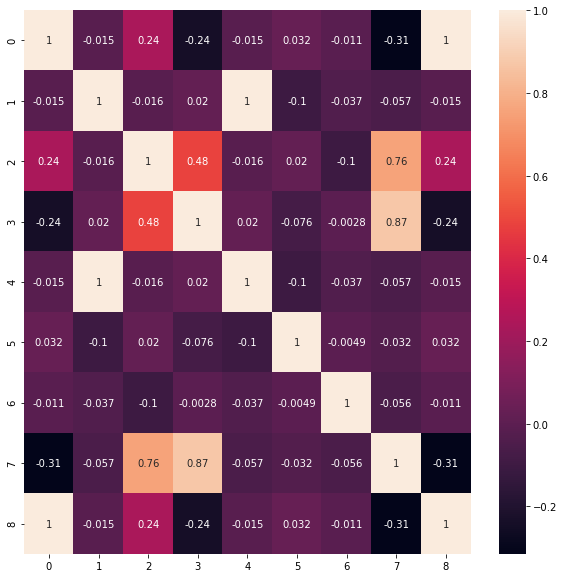

In [9]:
# Korelacja pomiędzy atrybutami
plt.figure(figsize = (10, 10))
corr = dane.iloc[:, :-1].corr()
sns.heatmap(corr, annot = corr)

**Wnioski z analizy korelacji:** 
* Widoczna jest silna korelacja par atrybutów: (8, 1), (4, 1), (3, 7), (2, 7). W przypadku pierwszej pary korelacja jest całkowicie dodatnia. Możemy odrzucić jeden atrybut z każdej z tych par, a zdecydowanie z pierwszej.
* Często powtarzającymi się korelującymi atrybutami są 1 i 7, więc możemy je odrzucić. 

**Odrzucone atrybuty: 1, 5, 6, 7.**

Tu wpisz wybrane atrybuty (numery):
* 0
* 2
* 3
* 4
* 8



> **Zadanie 2** Przetestuj 6 wybranych klasyfikatorów i wybierz najlepszy z nich (w przypadku k-NN możesz użyć jedynie dwóch wartości k, traktując klasyfikaotry z takimi wartościami k jako odrębne, także w przypadku drzewa decyzyjnego możesz użyć jedynie dwóch wartości argumentu określającego stopień dopasowania drzewa).

In [7]:
# Potrzebne funkcje

def divide(data, proportion = 0.3):
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(
        data.iloc[:,0:-1], 
        data.iloc[:,-1].astype('category').cat.codes, 
        test_size = proportion
    )

    return {
        "opis_ucz":opis_ucz, 
        "opis_test":opis_test, 
        "dec_ucz":dec_ucz, 
        "dec_test":dec_test
    }


def getErrorMatrix(data, testResult):
    return pd.crosstab(data["dec_test"], testResult) 


def getTotalErrors(errorMatrix):
    totalErrors = 0
    # Errors above diagonal
    for row in range(0, errorMatrix.shape[0]):
        for column in range(row + 1, errorMatrix.shape[1]):
            totalErrors += errorMatrix.iloc[row, column]
    # Errors below diagonal
    for column in range(0, errorMatrix.shape[1]):
        for row in range(column + 1, errorMatrix.shape[0]):
            totalErrors += errorMatrix.iloc[row, column]

    return totalErrors


def verify(data, model, attributes):
    model.fit(
        data["opis_ucz"].iloc[:, attributes], 
        data["dec_ucz"]
    )
    
    testResult = model.predict(
        data["opis_test"].iloc[:, attributes]
    )

    testErrorMatrix = getErrorMatrix(data, testResult)
    print("Macierz pomyłek dla zbioru testowego:")
    print(testErrorMatrix)

    totalErrors = getTotalErrors(testErrorMatrix)
    print("Suma błędów zbioru testowego: %d" % totalErrors)


In [8]:
# Rozwiązanie
attributes = [0, 2, 3, 4, 8]
models = [
    KNeighborsClassifier(n_neighbors = 2),
    KNeighborsClassifier(n_neighbors = 5),
    tree.DecisionTreeClassifier(max_depth = 5),
    tree.DecisionTreeClassifier(max_depth = 8),
    NearestCentroid(),
    GaussianNB(),
]

dividedData = divide(dane, 0.33)

print("[Rozpoczynam badanie klasyfikatorów...]")
print("")
i = 1
for model in models:
    print("%d. Wynik dla modelu \'%s\':" % (i, str(model)))
    verify(dividedData, model, attributes)
    print("") # Przerwa
    i += 1

print("[Zakończyłem badanie klasyfikatorów.]")

[Rozpoczynam badanie klasyfikatorów...]

1. Wynik dla modelu 'KNeighborsClassifier(n_neighbors=2)':
Macierz pomyłek dla zbioru testowego:
col_0   0   1   2  3   4   5
row_0                       
0      27   0   0  0   0   0
1       3  18   0  0   0   0
2       0   0  17  0   0   0
3       0   0   0  7   0   0
4       0   1   0  0  18   0
5       0   0   0  0   0  13
Suma błędów zbioru testowego: 4

2. Wynik dla modelu 'KNeighborsClassifier()':
Macierz pomyłek dla zbioru testowego:
col_0   0   1   2  3   4   5
row_0                       
0      27   0   0  0   0   0
1       0  21   0  0   0   0
2       0   0  17  0   0   0
3       0   0   0  7   0   0
4       0   1   0  0  18   0
5       0   0   0  0   0  13
Suma błędów zbioru testowego: 1

3. Wynik dla modelu 'DecisionTreeClassifier(max_depth=5)':
Macierz pomyłek dla zbioru testowego:
col_0   0   1   2  3   4   5
row_0                       
0      27   0   0  0   0   0
1       0  20   0  0   1   0
2       0   0  16  1   0   0
3     

Wnioski z zad. 2 (który klasyfikator jest najlepszy i dlaczego - w uzasadnieniu odnieś się do otrzymanych powyżej danych):
* W wyniku wielokrotnych uruchomień podczas badania konkretnie tego zbioru danych najlepiej wypadł klasyfikator 5-najbliższych sąsiadów. 
* Klasyfikator 5-najbliższych sąsiadów popełnił najmniej błędów, ponieważ tylko 1 błąd (pomylił klasę 1 i 4).
* Pomyłka ta nie wynika z potencjalnego błędu w danych. Z wcześniej narysowanych wykresów atrybutów poszczególnych klas dobrze widać, że klasy 1 i 4 różnią się od siebie. 
* Drugim najlepszym klasyfikatorem okazał się klasyfikator najbliższego centroidu, który popełnił tylko 2 błędy (dla dwóch różnych par klas, czyli nie jest oznacza to bliskości tej pary).
* Najgorszym klasyfikatorem dla tego zbioru okazał się naiwny klasyfikator Bayesa, który popełnił najwięcej błędów (dla kilku różnych par klas, czyli nie jest oznacza to bliskości tych par).

> **Zadanie 3** (niepunktowane) Zmień nazwę tego skryptu na następującą "PRiAD5_Imię_Nazwisko.ipynb" i wgraj wgraj go do ISOD-a we wskazane miejsce, nie przekraczając wyznaczonego terminu.